In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#random sample of 50k rows from the original dataset (better for representativeness)

#read a larger chunk
df_large = pd.read_csv('../raw_data/goodreads_interactions.csv', nrows=500000)

#randomly sample 50k
df = df_large.sample(n=50000, random_state=42)  # random_state for reproducibility

In [ ]:
df.dtypes

user_id        int64
book_id        int64
is_read        int64
rating         int64
is_reviewed    int64
dtype: object

In [ ]:
df.shape

(50000, 5)

In [8]:
df.head()

,user_id,book_id,is_read,rating,is_reviewed
104241,244,60924,1,5,1
199676,437,98786,0,0,0
140199,319,75314,0,0,0
132814,309,42643,1,3,1
408697,840,1634,0,0,0


In [29]:
#check data quality
#missing values
print(df.isnull().sum())

user_id        0
book_id        0
is_read        0
rating         0
is_reviewed    0
dtype: int64


In [30]:
#duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [31]:
#basic statistics
df.describe()

,user_id,book_id,is_read,rating,is_reviewed
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,528.608500,51428.110020,0.505680,1.844240,0.07374
std,292.451336,51088.499882,0.499973,2.052312,0.26135
min,0.000000,2.000000,0.000000,0.000000,0.00000
25%,292.000000,8778.000000,0.000000,0.000000,0.00000
50%,530.000000,29902.000000,1.000000,0.000000,0.00000
75%,778.000000,84344.000000,1.000000,4.000000,0.00000
max,1033.000000,182066.000000,1.000000,5.000000,1.00000


In [16]:
#check if any unread books (is_read =0) have non-zero ratings
unread_with_ratings = df[(df['is_read'] == 0) & (df['rating'] > 0)]
print(f"Number of unread books with non-zero ratings: {len(unread_with_ratings)}")

#check if any read books (is_read =1) have zero ratings
read_without_ratings = df[(df['is_read'] == 1) & (df['rating'] == 0)]
print(f"Number of read books with zero ratings: {len(read_without_ratings)}")

Number of unread books with non-zero ratings: 0
Number of read books with zero ratings: 1596


In [ ]:
#check the relationship between rating =0 and is_reviewed
read_no_rating = df[(df['is_read'] == ) & (df['rating'] == 0)]
print(f"Read books with rating =0: {len(read_no_rating)}")
print(f"Of these, how many reviews: {read_no_rating['is_reviewed'].sum()}")
print(f"Percentage with reviews: {read_no_rating['is_reviewed'].sum() / len(read_no_rating) * 100:.2f}%")


Read books with rating =0: 1596
Of these, how many reviews: 54
Percentage with reviews: 3.38%


In [ ]:
#filter for read books only
read_books = df[df['is_read'] == 1]

#Distribution of all ratings (including 0)
print("\nRating distribution(read books only)")
rating_counts = read_books['rating'].value_counts().sort_index()
rating_pct = (rating_counts / len(read_books) * 100).round(2)

for rating in sorted(read_books['rating'].unique()):
    count = rating_counts.get(rating, 0)
    pct = rating_pct.get(rating, 0.0)
    print(f"Rating {rating}: Count = {count}, Percentage = {pct}%")



Rating distribution(read books only)
Rating 0: Count = 1596, Percentage = 6.31%
Rating 1: Count = 395, Percentage = 1.56%
Rating 2: Count = 1420, Percentage = 5.62%
Rating 3: Count = 5624, Percentage = 22.24%
Rating 4: Count = 9140, Percentage = 36.15%
Rating 5: Count = 7109, Percentage = 28.12%


In [ ]:
#understand what is_reviewed means

#Does is_reviewed = 1 mean rating >0?
print(pd.crosstab(df['is_reviewed'], df['rating'] > 0,
                  rownames=['is_reviewed'], colnames=['rating > 0']))

#Do all reviewed books have ratings
reviewed = df[df['is_reviewed'] ==1]
print(f"Number of reviewed books without ratings: {len(reviewed[reviewed['rating'] ==0])}")

#Distribution of ratings for reviewed books
print(reviewed['rating'].value_counts().sort_index())

rating > 0   False  True 
is_reviewed              
0            26215  20098
1               97   3590
Number of reviewed books without ratings: 97
rating
0      97
1     102
2     262
3     852
4    1341
5    1033
Name: count, dtype: int64


In [25]:
# If 0 was a real rating, it should correlate with is_read=1
print("Rating=0 distribution:")
print(df[df['rating'] == 0]['is_read'].value_counts())

# Also check: do unread books ever have rating=0?
print(f"\nUnread books with rating=0: {len(df[(df['is_read']==0) & (df['rating']==0)])}")
print(f"Read books with rating=0: {len(df[(df['is_read']==1) & (df['rating']==0)])}")

Rating=0 distribution:
is_read
0    24716
1     1596
Name: count, dtype: int64

Unread books with rating=0: 24716
Read books with rating=0: 1596


In [37]:
#verify total read books

total_read = len(df[df['is_read'] ==1])
print(f"Total read books(is_read=1): {total_read}")

Total read books(is_read=1): 25284



Unique users: 1032
Unique books: 33275
count    1032.000000
mean       48.449612
std        62.642469
min         1.000000
25%        15.750000
50%        27.000000
75%        56.000000
max       523.000000
dtype: float64


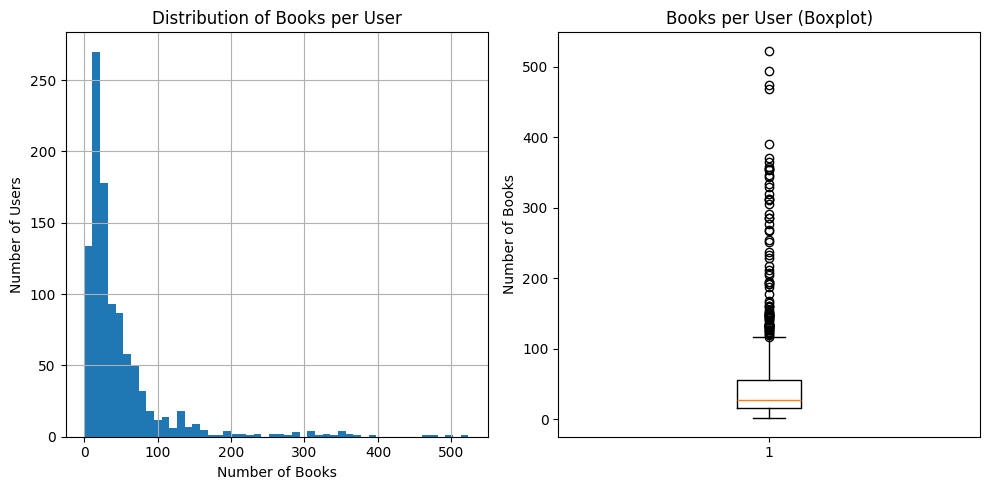


Max books per user: 523
Min books per user: 1
Median books per user: 27.0


In [ ]:
# unique users and books
print(f"\nUnique users: {df['user_id'].nunique()}")
print(f"Unique books: {df['book_id'].nunique()}")

# books per user distribution
books_per_user = df.groupby('user_id').size()
print(books_per_user.describe())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
books_per_user.hist(bins=50)
plt.xlabel('Number of Books')
plt.ylabel('Number of Users')
plt.title('Distribution of Books per User')

plt.subplot(1, 2, 2)
plt.boxplot(books_per_user)
plt.ylabel('Number of Books')
plt.title('Books per User (Boxplot)')
plt.tight_layout()
plt.show()

# Top/bottom users
print(f"\nMax books per user: {books_per_user.max()}")
print(f"Min books per user: {books_per_user.min()}")
print(f"Median books per user: {books_per_user.median()}")

In [43]:
#understand rating vs. review correlation

#filter only rated books (rating > 0)
rated_books = df[df['rating'] > 0].copy()

print("\nReview Rate by Rating")
review_by_rating = rated_books.groupby('rating')['is_reviewed'].agg(['sum', 'count', 'mean'])
review_by_rating.columns = ['Reviews', 'Total', 'Review_Rate(%)']
review_by_rating['Review_Rate(%)'] = (review_by_rating['Review_Rate(%)'] * 100).round(2)
print(review_by_rating)

print(f"\nAverage rating for reviewed books: {rated_books[rated_books['is_reviewed']==1]['rating'].mean():.2f}")
print(f"Average rating for non-reviewed books: {rated_books[rated_books['is_reviewed']==0]['rating'].mean():.2f}")


Review Rate by Rating
        Reviews  Total  Review_Rate(%)
rating                                
1           102    395           25.82
2           262   1420           18.45
3           852   5624           15.15
4          1341   9140           14.67
5          1033   7109           14.53

Average rating for reviewed books: 3.82
Average rating for non-reviewed books: 3.91


Data Summary (50k sample) 
Dataset Structure: 
- 5 columns: user_id, book_id, is_read, rating, is_reviewed (all int64)
- No duplicates or missing values 

Rating Scale: 
- Dataset: 0-5 (where 0 = “not rated”, 1-5 = actual ratings)
- Goodreads platform only allows rating 1-5

Key Findings: 
- All unread books (is_read=0) have rating =0
- Read books: 25,284 total 
- With ratings (>0): 23,688 (93.7%)
- Without rating (=0), 1,596 (6.3%); of these, 54 have reviews (3.38%) 
- Rating Distribution (read books with ratings): 
-- Rating 4: 36.15% (highest) 
-- Rating 5: 28.12% (2nd highest) 
-- Rating 3: 22.24%
-- Rating 2: 5.62%
-- Rating 1: 1.56% 
- Reviews: 
-- Total read books with reviews: 3,687
-- Reviews without rating: 97
-Rating vs. Reviews: 
-- For rating =1, it has the highest review rate. People might be more inclined to leave reviews with low scores. Average rating for   reviewed books is slightly lower (3.82 vs. 3.91)
- Users: 
-- # of unique users: 1,032
-- # of unique books: 33,275
-- Avg # of books/user: 48
-- Min # of books/user: 1
-- Max # of books/user:: 523


Next steps for recommender system: 
Approach: Hybrid recommender combining: 
- Collaborative filtering: user ratings (1-5) from similar users 
- Content-based: use book metadata (genres, authors, etc) 
Challenges: 
-  Cold start: how to recommend for new users/books? 
-  Powers users vs. casual readers (1 to 523 books per user) 
Data to use: 
-  Primary: 23,688 explicit ratings (rating >0)
